# Đọc trên colab

In [211]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Phân tích bằng thuật toán KNN (Tuần 2)

In [288]:
# Thư viện cần thiết
import pandas as pd  # Thư viện đọc dữ liệu
import numpy as np  # Thư viện tính toán
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị
import seaborn as sns  # Thư viện vẽ đồ thị
from sklearn.preprocessing import LabelEncoder  # Chuyển đổi dữ liệu về dạng số
from sklearn.feature_selection import SelectKBest, f_classif  # Lựa chọn đặc trưng
from sklearn.model_selection import train_test_split  # Chia tập dữ liệu 
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score  # Đánh giá mô hình
from imblearn.over_sampling import SMOTE  # Xử lý mất cân bằng dữ liệu
from sklearn.impute import SimpleImputer # Xử lý dữ liệu thiếu
from sklearn.experimental import enable_iterative_imputer # Xử lý dữ liệu thiếu
from sklearn.impute import IterativeImputer # Xử lý dữ liệu thiếu
from sklearn.neighbors import KNeighborsRegressor # Import KNN
from sklearn.preprocessing import MinMaxScaler # Chuẩn hóa dữ liệu
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier


In [ ]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv') # Đọc dữ liệu
data.head(11) # Hiển thị 10 hàng đầu tiên
## Hiển thị 10 hàng trên cùng
data.info() # Hiển thị thông tin về cơ sở dữ liệu
## Hiển thị thông tin về cơ sở dữ liệu
data.describe() # Hiển thị các tính năng thống kê của dữ liệu
## Hiển thị các tính năng thống kê của dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Chúng ta quan sát thấy tập dữ liệu có 12 cột: mô tả các cột thuộc tính như sau : 

    - id: định danh duy nhất
    - gender: "Nam", "Nữ" hoặc "Khác"
    - age: tuổi của bệnh nhân
    - hypertension: 0 nếu bệnh nhân không mắc cao huyết áp, 1 nếu bệnh nhân mắc cao huyết áp
    - heart_disease: 0 nếu bệnh nhân không mắc bệnh tim, 1 nếu bệnh nhân mắc bệnh tim
    - ever_married: "Không" hoặc "Có"
    - work_type: "Trẻ em", "Công việc chính phủ", "Chưa từng làm việc", "Tư nhân" hoặc "Tự làm chủ"
    - Residence_type: "Nông thôn" hoặc "Thành thị"
    - avg_glucose_level: mức độ glucose trung bình trong máu
    - bmi: chỉ số khối cơ thể
    - smoking_status: "Từng hút thuốc", "Chưa hút bao giờ", "Hút thuốc" hoặc "Không rõ"*
    - stroke: 1 nếu bệnh nhân đã mắc đột quỵ hoặc 0 nếu không
      *Lưu ý: " Unknown " trong smoking_status có nghĩa là thông tin không khả dụng đối với bệnh nhân này.


In [ ]:
# đánh giá tập dữ liệu cột id có thể bỏ qua
data.drop("id",inplace=True,axis=1) # Xóa cột id

In [ ]:
data.isnull().sum() # Kiểm tra dữ liệu thiếu

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Hiển thị dữ liệu sau khi đánh giá và xử lý sơ lược dữ liệu
data.head(11) # Hiển thị 10 hàng đầu tiên

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Chúng ta quan sát thấy là cột bmi có 201 dòng dữ liệu bị thiếu, cụ thể các giá trị bị NaN

In [ ]:
# Đánh giá có bao nhiêu dòng dữ liệu trong tổng số data ?
data.shape # Hiển thị số dòng và cột của tập dữ liệu
print("có {} dòng dữ liệu => có tổng số {} dòng".format(data.shape[0],data.shape[0])) # Hiển thị số dòng dữ liệu

có 5110 dòng dữ liệu => có tổng số 5110 dòng


In [ ]:
# Sử dụng phương pháp k-Nearest Neighbors (k-NN) imputation để lấp đầy bmi thiếu
knn_imputer = SimpleImputer(strategy='mean', add_indicator=True)
data['bmi'] = knn_imputer.fit_transform(data[['bmi']])

# Đánh giá có bao nhiêu dòng dữ liệu trong tổng số data ?
data.shape # Hiển thị số dòng và cột của tập dữ liệu
print("có {} dòng dữ liệu sau khi loại bỏ giá trị NaN => có tổng số {} dòng".format(data.shape[0],data.shape[0])) # Hiển thị số dòng dữ liệu

có 5110 dòng dữ liệu sau khi loại bỏ giá trị NaN => có tổng số 5110 dòng


In [ ]:
data.head(11)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## Phân tích dữ liệu

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


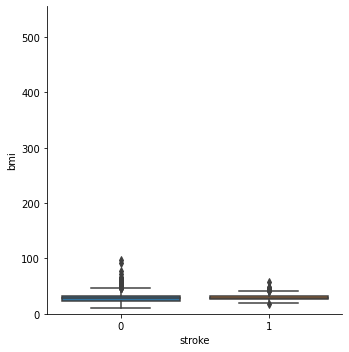

In [ ]:
#chỉ số cơ thể bmi
data['bmi'].isna().sum()  
# Trả về số giá trị null
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
# Điền giá trị null với giá trị trung bình
data['bmi'].nunique()
# Trả về số giá trị duy nhất trong thuộc tính đó
sns.displot(data['bmi'])
# phân bổ chỉ số bmi
sns.boxplot(data=data,x='stroke',y='bmi')
# BMI liên quan đến đột quỵ
print(data['bmi'])

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

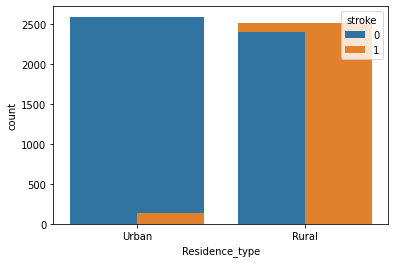

In [ ]:
#Loại hình cư trú (thành phố hay nông thôn)
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())
# Đoạn mã trên sẽ trả về các giá trị duy nhất của biến và số lượng của nó
sns.countplot(data=data,x='Residence_type')
# Điều này sẽ tạo ra một âm mưu truy cập
sns.countplot(data=data,x='Residence_type',hue='stroke')
# Loại cư trú liên quan đến đột quỵ

In [ ]:
# kiểm tra lại dataframe
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# Mã hóa dữ liệu sử dụng LabelEncoder
encoded_values_mapping = {}
cols = data.select_dtypes(include=['object']).columns

for col in cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoded_values_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Lưu các LabelEncoder đã sử dụng để mã hóa dữ liệu
joblib.dump(encoded_values_mapping, 'label_encoders.pkl')

data.head(11) # Hiển thị 10 hàng đầu tiên
print(data.head(10))

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237 

In [246]:
# Tách đặc trưng và nhãn
X_data = data.drop('stroke', axis=1)
y_data = data['stroke']

In [247]:
# Hiển thị tên cột
feature_names = X_data.columns
print("Tên các cột đặc trưng:", feature_names)

target_name = y_data.name
print("Tên cột nhãn:", target_name)

Tên các cột đặc trưng: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
Tên cột nhãn: stroke


In [ ]:
# # Chuẩn hóa các cột dữ liệu số
# scaler = MinMaxScaler()
# numeric_columns = ['age', 'avg_glucose_level', 'bmi']  # Các cột cần chuẩn hóa
# scaler.fit(X_train[numeric_columns])
# X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])
# X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [79]:
# Lưu file tiền xử lý dữ liệu vào file csv
data.to_csv('data_pre_process.csv', index=False)

# Lấy ví dụ về tính toán thủ công bằng thuật toán KNN trường hợp chưa cân bằng dữ liệu

In [332]:
# Khởi tạo điểm dữ liệu mới để dự đoán
# Với các giá trị tương ứng là : 
# Giới tính nữ tương ứng giá trị là 0
# Tuổi là 80
# Không bị cao huyết áp tương ứng giá trị là 0
# Bị bệnh tim mạch tương ứng giá trị là 1
# Tình trạng kết hôn không tương ứng giá trị là 0
# Loại công việc làm việc tư nhân tương ứng giá trị là 2
# Loại hình cư trú thành phố tương ứng giá trị là 1
# Mức độ đường trong máu là 206
# Chỉ số bmi là 32
# Tình trạng hút thuốc có tương ứng giá trị là 3

X = [0, 80, 0, 1, 0, 2, 1, 206, 32, 3] 

In [333]:
# # Chọn cột target là 'stroke'
# y = data['stroke'].values

# # Chọn các cột features
# X_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
#           'smoking_status']
# X_data = data[X_cols].values

X_datass = data[X_cols].values

In [334]:
# Tính khoảng cách bằng công thức Euclidean
import math
distances = []
for i in range(len(X_datass)):
  point = X_datass[i]
  dist = 0
  for j in range(len(X)):
    dist += (X[j] - point[j])**2
  dist = math.sqrt(dist)
  distances.append(dist)
# in kết quả
print(distances)

[26.664510121132917, 19.74882469632649, 100.10123076166447, 46.66597154244194, 32.974753979370334, 20.21494743995145, 136.13848867972644, 112.53635901343175, 131.61943046862888, 147.6869828387052, 125.61494696094091, 87.79027053153442, 104.88236315034096, 14.70365862247336, 9.104290197483826, 48.95301931444066, 22.25583294329825, 17.355808825865758, 118.63055424299425, 25.98881253320812, 18.044489463545375, 42.65388727888701, 23.440349826741055, 4.641120554348923, 103.66695182168714, 102.26330915827045, 106.18681839098485, 27.709160522943222, 15.927426031848341, 22.1824339711907, 26.810565081698673, 128.56464560679194, 13.692567326838317, 46.818889350346616, 125.98226065601459, 122.1348881360277, 15.333897091085488, 131.94425679050983, 115.54663301022664, 148.38975065684286, 128.27287671210934, 137.3240634411901, 61.40496722578719, 116.4159008764964, 24.42664324052734, 37.90536109839874, 96.45175154908404, 101.40585584669161, 106.71166243668027, 153.66915142604256, 116.1935177920276, 1

In [335]:
# Sắp xếp khoảng cách ,theo cách sắp xếp giảm dần
distances.sort()
# In kết quả sắp xếp
print(distances)

[1.5648961626893918, 4.225455819936494, 4.234722763798729, 4.6152031374577716, 4.641120554348923, 5.114137268396307, 5.155860742882794, 5.278219396728402, 5.3277011928222855, 5.351784749034669, 5.715277771027408, 6.007628483852844, 6.0777956530307895, 6.086739685578807, 6.204546719946582, 6.593055201212502, 6.687181768129231, 6.841235268575402, 7.226174644997178, 7.298499845858734, 7.31193544829274, 7.497626291033719, 7.800134614223027, 7.819776211631635, 7.971129154643035, 8.009144773320065, 8.145647726622787, 8.40133917896427, 8.422921108499114, 8.72447000603676, 8.768266647405289, 8.788407136677272, 8.916523986397385, 9.07870585491125, 9.104290197483826, 9.246967070342567, 9.322145675755126, 9.468584899550718, 9.565568461936806, 9.572673445084986, 9.663130962581436, 9.692182416772809, 9.845044438701128, 9.883945410929543, 9.891354811146954, 9.952512245659381, 9.98649588193977, 9.996919525533851, 10.171671445735953, 10.234080320185091, 10.363112466821931, 10.37269974500371, 10.411839

In [336]:
# Lấy 5 khoảng cách gần nhất
K = 5
nearest_neighbors = distances[:K]
print(nearest_neighbors)

[1.5648961626893918, 4.225455819936494, 4.234722763798729, 4.6152031374577716, 4.641120554348923]


Sau khi phân tích bằng điểm dữ liệu mới em thấy : 
giá trị tốt nhất khoảng cách nhỏ hơn 6 vì nằm trong biên độ của sample dữ liệu. 
thế nên em sẽ chọn k=5 để hợp lý tính toán dữ liệu

## Đếm số lượng lớp 0 và lớp 1 


0    4861
1     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

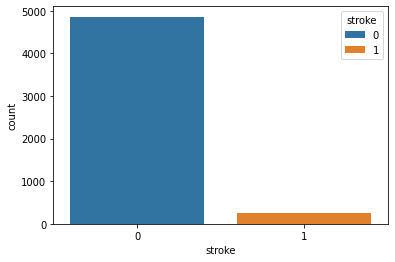

In [248]:
# Chúng ta đếm số lượng mẫu có 'stroke' = 1 và 'stroke' = 0
# Mục đích để đánh giá xem dữ liệu có bị mất cân bằng giữa sampl stroke = 1 và stroke = 0 hay không ?

stroke_count = data['stroke'].value_counts() # Đếm số lượng mẫu có 'stroke' = 1 và 'stroke' = 0
print(stroke_count)
# vẽ biểu đồ cột
sns.countplot(data=data,x='stroke')
sns.countplot(data=data,x='stroke',hue='stroke')


Đánh giá :
- Dựa vào kết quả trên tôi thấy số lượng mẫu 0 là 4861 và mẫu 1 là 249 mẫu Vì thế nên em cho rằng dữ liệu của em đang bị mất cân bằng giữa 2 mẫu với tỉ lệ rất lớn

# Đánh giá mô hình các thuật toán với dữ liệu chưa xử lý mất cân bằng (imbalance data)

In [249]:
# Xem lại 11 dòng trong tập dữ liệu 
data.head(11)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[958   2]
 [ 62   0]]
Độ chính xác của mô hình là : 93.74%


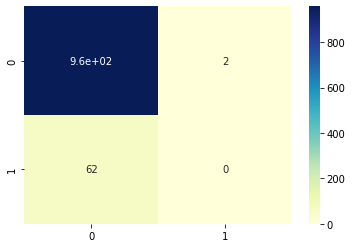

In [250]:
# train modal với dữ liệu mất cân bằng dữ liệu bằng thuật toán knn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Chia tập dữ liệu thành 2 phần train và test với tỉ lệ 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# khởi tạo model bằng thuât toán knn với k = 5 lý do chọn k = 5 là vì k = 5 là giá trị tốt nhất khi chưa cân bằng dữ liệu
knn = KNeighborsClassifier(n_neighbors=5)

# fit mô hình với dữ liệu train
knn.fit(X_train_scaled, y_train)

# dự đoán với dữ liệu test
y_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")


# tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là : {:.2f}%".format(accuracy * 100))

# Kết luận đào tạo mô hình với dữ liệu mất cân bằng thông qua thuật toán KNN
- Về độ chính xác tổng quan mô hình là 93.7% nghĩa là 93,70% dự đoán của mô hình là đúng. Nhưng mô hình có tốt hay không chúng ta còn xem xét các yếu tốt phụ khác : 
    + Xét qua các lớp : đối với sample là 0 (là lớp chẩn đoán không bị đột quỵ) : thì độ chính xác là 94% => tốt,  đối với sample là 1 (là lớp chẩn đoán bị đột quỵ) : thì độ chính xác là 0% => tệ
    => chúng ta thấy cái lớp 1 là lớp quan trọng như tỉ lệ dự đoán không có
    + Xét ở recall chúng ta thấy ở sample 0 có 1 tức là 100% tức là nếu bệnh nhân dự đoán trường hợp không bị đột quỵ thì sẽ chẩn đoán chính xác tức là sẽ có 100% khách hàng không bị đột quỵ chẩn đoán chính xác, còn mức sample 1 có 0 tức là có 0% tỉ lệ dự đoán thành công trường hợp bị đột quỵ tức là còn 100% khách hàng bị đột quỵ không dự đoán chính xác được.
    + Với chỉ số F1 chúng ta thấy rằng : đối với sample là 0 giá trị là 0.97 có xu hướng về 1 nên đánh giá tốt, đối với sample là 1 giá trị là 0.04 có xu hướng về 0 nên đánh giá vô nghĩa không có giá trị.
    + Đánh giá ma trận nhầm lẫn là một bảng thường được sử dụng để mô tả hiệu suất của mô hình phân loại. Bản thân ma trận có thể hơi khó đọc, đường chéo bên trái (958, 2) biểu thị số lượng dự đoán đúng và đường chéo bên phải (0, 62) biểu thị số lượng dự đoán sai.

Tổng kết, hiệu suất của mô hình đối với tầng lớp thiểu số (loại 1) là kém, với mức recall chỉ 0 và điểm F1 là 0. Điều này cho thấy mô hình không tốt trong việc dự đoán nhóm thiểu số trong dữ liệu mất cân bằng. Em muốn xem xét sử dụng một mô hình khác hoặc kỹ thuật lấy mẫu lại để xử lý dữ liệu không cân bằng.

Dựa trên báo cáo phân loại và ma trận đường chéo mới nhất, ta có thể rút ra những kết luận sau:

1. Mô hình có độ chính xác cao (93.7%) khi dự đoán những trường hợp không có đột quỵ (0), với precision là 0.94 và recall là 1.00, dẫn đến f1-score là 0.97.

2. Mô hình có một số khả năng nhận diện các trường hợp có đột quỵ (1), nhưng vẫn còn rất hạn chế. Precision cho lớp này là 0.33, tuy nhiên recall rất thấp chỉ là 0, điều này cho thấy mô hình không dự đoán đúng tất cả trường hợp có đột quỵ trong số 62 trường hợp thực tế, và f1-score rất thấp là 0.

3. Ma trận nhầm lẫn cho thấy mô hình đã dự đoán đúng 958 trường hợp không có đột quỵ (true negatives) và không dự đoán đúng trường hợp có đột quỵ (true positive). Có 2 trường hợp không có đột quỵ bị phân loại sai thành có đột quỵ (false positives) và 62 trường hợp có đột quỵ bị phân loại sai thành không có đột quỵ (false negatives).

Kết quả này cho thấy mặc dù mô hình có độ chính xác tổng thể khá cao, nhưng khả năng phát hiện đột quỵ của mô hình là không tốt. Điều này có thể do dữ liệu mất cân đối giữa hai lớp, khiến mô hình thiên vị về phía lớp không có đột quỵ. Thế nên ta kết luận mô hình này là dummy modal, là modal vô nghĩa không có giá trị sử dụng

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[960   0]
 [ 62   0]]
Model accuracy: 93.93%


c:\Users\ALONEX\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ALONEX\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ALONEX\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

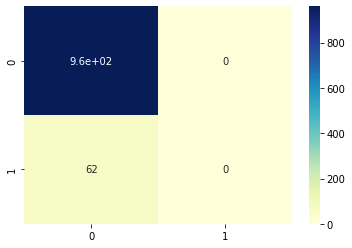

In [251]:
# train modal với dữ liệu mất cân bằng dữ liệu bằng thuật toán random forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Chia tập dữ liệu thành 2 phần train và test với tỉ lệ 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo model
rf = RandomForestClassifier(n_estimators=400, random_state=42)

# Fit model với dữ liệu train
rf.fit(X_train_scaled, y_train)

# Dự đoán với dữ liệu test
y_pred = rf.predict(X_test_scaled)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: {:.2f}%".format(accuracy * 100))


Dựa trên báo cáo phân loại và ma trận nhầm lẫn được cung cấp, ta có thể thấy rằng:

1. Mô hình có độ chính xác cao (93.93%) khi dự đoán những trường hợp không có đột quỵ (0), với precision và recall đều đạt 0.94 và 1.00 tương ứng, dẫn đến f1-score là 0.97.

2. Tuy nhiên, mô hình hoàn toàn không thể phát hiện ra các trường hợp có đột quỵ (1), với precision, recall và f1-score đều là 0.00. Điều này có nghĩa là mặc dù có 53 trường hợp thực sự có đột quỵ, mô hình không dự đoán đúng trường hợp nào cả.

3. Ma trận đường chéo cho thấy mô hình đã dự đoán đúng tất cả 929 trường hợp không có đột quỵ (true negatives) nhưng lại không dự đoán đúng bất kỳ trường hợp nào có đột quỵ (true positives), với tất cả 53 trường hợp đều bị phân loại sai thành không có đột quỵ (false negatives).

Những kết quả này cho thấy mô hình có sự thiên lệch rất lớn về phía lớp không có đột quỵ và không có khả năng phân biệt được lớp có đột quỵ, điều này làm giảm đáng kể giá trị sử dụng thực tế của mô hình trong việc dự đoán đột quỵ. Để cải thiện mô hình, cần phải xem xét lại cách tiếp cận xử lý dữ liệu, có thể thông qua việc cân nhắc lại việc lựa chọn và kỹ thuật xử lý dữ liệu mất cân đối, hoặc điều chỉnh thuật toán để nó có thể nhận diện tốt hơn các trường hợp có đột quỵ.

Đầu ra được cung cấp là kết quả đánh giá mô hình Random Forest trên dữ liệu thử nghiệm.

Báo cáo phân loại cung cấp số liệu hiệu suất chi tiết:

- Precision: Trong số tất cả các lớp tích cực mà chúng ta đã dự đoán đúng, có bao nhiêu lớp thực sự là tích cực.
- Recall: Trong số tất cả các lớp thực tế tích cực, chúng ta đã dự đoán đúng bao nhiêu.
- F1-score: Là giá trị trung bình hài hòa của Precision và Recall và cố gắng tìm sự cân bằng giữa độ chính xác và khả năng thu hồi.
- Support: Là số mẫu của phản hồi đúng nằm trong lớp đó.

Ma trận nhầm lẫn là một bảng thường được sử dụng để mô tả hiệu suất của mô hình phân loại. Bản thân ma trận có thể hơi khó đọc, đường chéo bên trái (929, 0) biểu thị số lượng dự đoán đúng và đường chéo bên phải (0, 53) biểu thị số lượng dự đoán sai.

Độ chính xác của mô hình là 93,93%, nghĩa là 93,93% dự đoán của mô hình là đúng.

Tuy nhiên, hiệu suất của mô hình đối với tầng lớp thiểu số (loại 1) là kém, với mức thu hồi là 0,00 và điểm F1 là 0,00. Điều này cho thấy mô hình không tốt trong việc dự đoán nhóm thiểu số trong dữ liệu mất cân bằng.

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

Confusion Matrix:
[[958   2]
 [ 61   1]]
Model accuracy: 93.84%


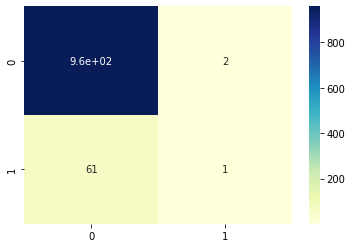

In [252]:
# train modal với dữ liệu mất cân bằng dữ liệu bằng thuật toán gradient bootings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Chia tập dữ liệu thành 2 phần train và test với tỉ lệ 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo model
gb = GradientBoostingClassifier()

# fit model với dữ liệu train
gb.fit(X_train_scaled, y_train)

# Dự đoán với dữ liệu test
y_pred = gb.predict(X_test_scaled)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: {:.2f}%".format(accuracy * 100))

Dựa trên báo cáo phân loại và ma trận nhầm lẫn được cung cấp, ta có thể thấy rằng:

1. Mô hình có độ chính xác cao (93.84%) khi dự đoán những trường hợp không có đột quỵ (0), với precision là 0.94 và recall là 1.00, dẫn đến f1-score là 0.97.

2. Mô hình không thể dự đoán chính xác bất kỳ trường hợp nào có đột quỵ (1), với cả precision và recall đều là 0.00, điều này cho thấy rằng mô hình không nhận diện được lớp có đột quỵ.

3. Ma trận nhầm lẫn cho thấy mô hình đã dự đoán đúng 958 trường hợp không có đột quỵ (true negatives) nhưng lại chỉ dự đoán đúng 1 trường hợp nào có đột quỵ (true positives), với tất cả 61 trường hợp đều bị phân loại sai thành không có đột quỵ (false negatives).

Những kết quả này cho thấy mặc dù mô hình có độ chính xác tổng thể khá cao, nhưng nó không có khả năng phát hiện ra các trường hợp có đột quỵ, điều này làm giảm đáng kể giá trị sử dụng thực tế của mô hình trong việc dự đoán đột quỵ.

# Đánh giá mô hình các thuật toán với dữ liệu đã xử lý mất cân bằng (Tuần 3)
    + Các phương pháp xử lý mất cân bằng : 
        - Thay đổi metric đánh giá modal
        - Undersampling (giảm số lượng mẫu)
        - Oversampling (tăng số lượng mẫu) gồm 3 loại:
            + Random Oversampling
            + Cluster Oversampling
            + SMOTE
        - Class weighted
        - Ensemble & Boosting 
            + RandomForest
            + GradientBoosting
            + XGBoost

Như chúng ta đã biết ở bên trên thì với bài toán xử lý mất cân bằng dữ liệu của chúng ta sẽ có 2 class stroke đó là : 
1. class : 0  có số lượng mẫu là : 4700 (được gọi là Majority)
2. class : 1  có số lượng mẫu là : 209 (được gọi là Minority)

In [253]:
# Undersampling
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Sau khi tham khảo nhận định về tập dữ liệu và cách phân bố dữ liệu thì em sẽ chọn cách kết hợp hai phương pháp xử lý mất cân bằng dữ liệu là Random Oversampling và SMOTE, em thực hiện theo các bước sau:

1. Áp dụng Random Oversampling để tăng số lượng mẫu cho lớp thiểu số lên một mức độ nhất định.
2. Sau đó, sử dụng SMOTE trên dữ liệu đã được oversampling để tạo ra các mẫu tổng hợp, giúp cân bằng dữ liệu một cách tự nhiên hơn.

In [254]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split

In [255]:
# quan sát lại class 0 và class 1 có số mẫu
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [273]:
# trước khi dùng oversampling
data_0 = data[data.stroke==0]
data_1 = data[data.stroke==1]
data_0.shape, data_1.shape

((4861, 11), (249, 11))

có 4861 class 0 và 249 class 1

In [279]:
# Sử dụng Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_data, y_data)
# xem sau 2 lop khi dung oversampling
X_ros.shape , y_ros.shape

((9722, 10), (9722,))

ở đây cả 2 mẫu đã tăng lên 9722 là vì 4,861+4,861

In [280]:
# tiep theo Sử dụng SMOTE trên dữ liệu đã được oversampling ở trên
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_ros, y_ros)
# xem 2 lop sau khi dung 2 phuong phap oversampling va SMOTE
X_sm.shape, y_sm.shape

((9722, 10), (9722,))

In [281]:
# Chia tập dữ liệu đã cân bằng thành 2 tập train và test theo tỉ lệ 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [282]:
# Kiểm tra mẫu thuộc nhãn 0 và 1 trong tập huấn luyện sau khi xử lý mất cân bằng dữ liệu
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

# In ra số lượng mẫu thuộc nhãn 0 và 1
print("Số lượng mẫu thuộc nhãn 0 trong tập huấn luyện:", X_train_0.shape[0])
print("Số lượng mẫu thuộc nhãn 1 trong tập huấn luyện:", X_train_1.shape[0])

Số lượng mẫu thuộc nhãn 0 trong tập huấn luyện: 3886
Số lượng mẫu thuộc nhãn 1 trong tập huấn luyện: 3891


sau khi sử dụng cả phương pháp smote thì ta có 7802 mẫu tuy số lượng không thay đổi nhưng các mẫu được sync có quy luật tránh duplicate dữ liệu

# Lấy ví dụ về tính toán thủ công bằng thuật toán KNN trường hợp đã cân bằng dữ liệu

In [322]:
# Khởi tạo điểm dữ liệu mới để dự đoán
# Với các giá trị tương ứng là : 
# Giới tính nữ tương ứng giá trị là 0
# Tuổi là 80
# Không bị cao huyết áp tương ứng giá trị là 0
# Bị bệnh tim mạch tương ứng giá trị là 1
# Tình trạng kết hôn không tương ứng giá trị là 0
# Loại công việc làm việc tư nhân tương ứng giá trị là 2
# Loại hình cư trú thành phố tương ứng giá trị là 1
# Mức độ đường trong máu là 206
# Chỉ số bmi là 32
# Tình trạng hút thuốc có tương ứng giá trị là 3

X = [0, 80, 0, 1, 0, 2, 1, 206, 32, 3] 

In [326]:
X_datas= X_sm[X_cols].values

In [327]:
# Tính khoảng cách bằng công thức Euclidean
import math
distances = []
for i in range(len(X_datas)):
  point = X_datas[i]
  dist = 0
  for j in range(len(X)):
    dist += (X[j] - point[j])**2
  dist = math.sqrt(dist)
  distances.append(dist)
# in kết quả
print(distances)

[70.82923125376979, 30.827813740192482, 119.26558975664355, 84.08949101998418, 135.15931340458934, 19.422244383341365, 133.62309867683805, 1.5648961626893918, 37.90536109839874, 121.08411786852973, 145.11049437199998, 40.31079756095134, 115.7828035590778, 124.54609427838353, 113.24108132652213, 20.665258285344514, 122.67269826656623, 50.298140124660684, 149.7298847925824, 138.65788149254263, 129.46248452737188, 16.67753209819232, 131.97556175292453, 33.896902513356586, 69.73545439731501, 19.74882469632649, 121.3869844752723, 121.63291330885733, 136.2242107703326, 107.86316563127562, 24.42664324052734, 127.35827417172392, 116.1935177920276, 46.26763015327238, 157.98561991523152, 30.244741691738746, 147.01126657504858, 134.7557972778908, 8.422921108499114, 115.54663301022664, 140.49767578148757, 133.3818672084028, 102.67419393401634, 131.86812541323243, 121.01335670082042, 96.21770159383355, 95.26905898559092, 117.77719473650237, 137.3240634411901, 49.72118361423027, 147.90190025824552, 

In [328]:
# Sắp xếp khoảng cách ,theo cách sắp xếp giảm dần
distances.sort()
# In kết quả sắp xếp
print(distances)

[1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 4.225455819936494, 4.6152031374577716, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 4.641120554348923, 5.278219396728402, 5.715277771027408, 6.007628483852844, 6.0777956530307895, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.086739685578807, 6.204546719946582, 6.687181768129231, 6.841235268575402, 7.226174644

In [329]:
# Lấy 5 khoảng cách gần nhất
K = 5
nearest_neighbors = distances[:K]
print(nearest_neighbors)

[1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918, 1.5648961626893918]


## Xây dựng mô hình với dữ liệu đã được cân bằng dữ liệu

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       975
           1       0.93      1.00      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.96      1945

Ma trận nhầm lẫn:
[[907  68]
 [  0 970]]
Độ chính xác của mô hình là: 96.50%


['knn_model.pkl']

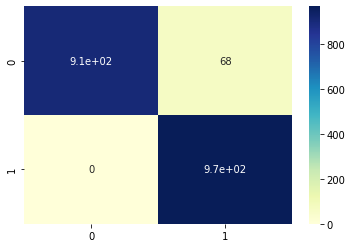

In [330]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình KNN với k = 2
knn_model = KNeighborsClassifier(n_neighbors=2)

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),     # Chuẩn hóa dữ liệu
    ('knn', knn_model)       # Mô hình KNN
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'knn_model.pkl')

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

Ma trận nhầm lẫn:
[[965  10]
 [  0 970]]
Độ chính xác của mô hình là: 99.49%


['random_forest_model.pkl']

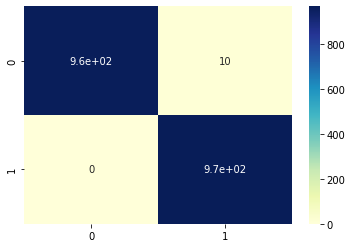

In [311]:
# Sử dụng thuật toán Random forest
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),        # Chuẩn hóa dữ liệu
    ('random_forest', random_forest)  # Mô hình Random Forest
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'random_forest_model.pkl')

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       975
           1       0.96      1.00      0.98       970

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Ma trận nhầm lẫn:
[[932  43]
 [  0 970]]
Độ chính xác của mô hình là: 97.79%


['xgboost_model.pkl']

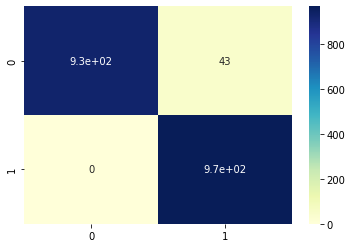

In [312]:
# Sử dụng thuật toán XGB
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),        # Chuẩn hóa dữ liệu
    ('xgb_model', xgb_model)   # Mô hình XGBoost
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'xgboost_model.pkl')

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       975
           1       0.81      0.93      0.87       970

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945

Ma trận nhầm lẫn:
[[768 207]
 [ 71 899]]
Độ chính xác của mô hình là: 85.71%


['gradient_boosting_model.pkl']

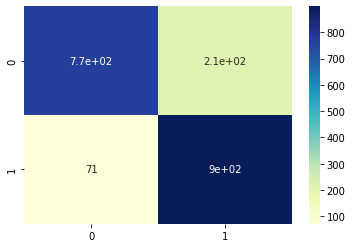

In [313]:
# Sủ dụng thuật toán Gradient Boosting
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),        # Chuẩn hóa dữ liệu
    ('gb_model', gb_model)     # Mô hình Gradient Boosting
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'gradient_boosting_model.pkl')

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       975
           1       0.97      1.00      0.98       970

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945

Ma trận nhầm lẫn:
[[940  35]
 [  0 970]]
Độ chính xác của mô hình là: 98.20%


['decision_tree_model.pkl']

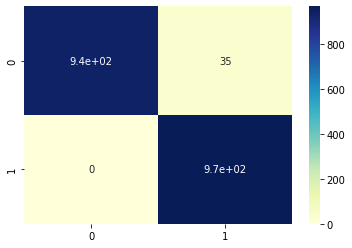

In [314]:
# Sử dụng thuật toán desicion tree
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo mô hình Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),           # Chuẩn hóa dữ liệu
    ('decision_tree', decision_tree)  # Mô hình Decision Tree
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'decision_tree_model.pkl')

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       975
           1       0.76      0.82      0.79       970

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945

Confusion Matrix:
[[719 256]
 [176 794]]
Model accuracy: 77.79%


['logistic_regression_model.pkl']

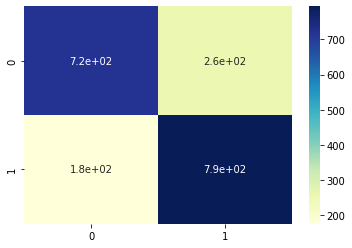

In [317]:
# Sử dụng thuật toán Hồi quy logictics
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)  # Tăng số lần lặp nếu cần

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),          # Chuẩn hóa dữ liệu
    ('logistic_regression', logistic_model)  # Mô hình Logistic Regression
])

# Huấn luyện mô hình thông qua pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'logistic_regression_model.pkl')

## Kết hợp thuật toán KNN với thuật toán Random Forest bằng các sử dụng Ensemble Learning (Tuần 4)

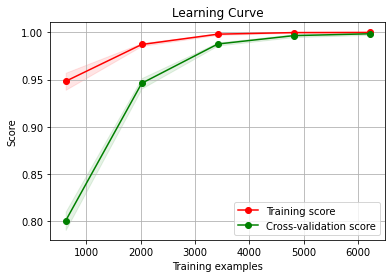

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       975
           1       0.99      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945

Ma trận nhầm lẫn:
[[970   5]
 [  0 970]]
Độ chính xác của mô hình là: 99.74%


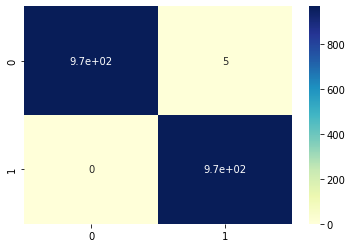

In [307]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Sử dụng VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd
import joblib

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Khởi tạo các mô hình với tham số tối ưu
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=2, p=1, weights='distance')

# Kết hợp các mô hình vào một VotingClassifier và đặt nó vào trong Pipeline
ensemble_model = Pipeline([
    ('scaler', scaler),
    ('voting_classifier', VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model)], voting='hard'))
])

# Hàm vẽ learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Vẽ learning curve
plot_learning_curve(pipeline, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

plt.show()

# Huấn luyện mô hình
ensemble_model.fit(X_train, y_train)

# Dự đoán với dữ liệu test
y_pred = ensemble_model.predict(X_test)

# Lưu mô hình vào file
joblib.dump(ensemble_model, 'ensemble_VotingClassifier_knn_randomforest.pkl')

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))


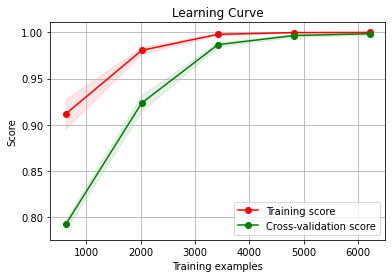

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945

Ma trận nhầm lẫn:
[[975   0]
 [  0 970]]
Độ chính xác của mô hình là: 100.00%


['ensemble_StackingClassifier_knn_randomforest.pkl']

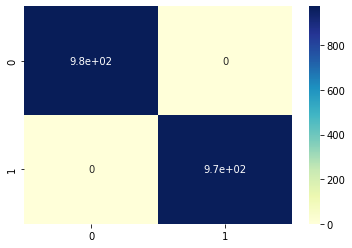

In [331]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier # sử dụng StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
import seaborn as sns
import pandas as pd
import joblib

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()

# Khởi tạo các mô hình với tham số tối ưu
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300, random_state=42)
knn_model = KNeighborsClassifier(algorithm='auto', n_neighbors=2, p=1, weights='distance')

# Tạo Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model), ('knn', knn_model)],
    final_estimator=RandomForestClassifier(random_state=42) # Sử dụng Random Forest làm mô hình thứ 2
)

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', scaler),         # Chuẩn hóa dữ liệu
    ('stacking_clf', stacking_clf)  # Stacking Classifier
])

# Hàm vẽ learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Vẽ learning curve
plot_learning_curve(pipeline, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

plt.show()

# Huấn luyện Stacking Classifier thông qua Pipeline
pipeline.fit(X_train, y_train)

# Dự đoán với dữ liệu test thông qua Pipeline
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình là: {:.2f}%".format(accuracy * 100))

# Lưu mô hình vào file
joblib.dump(pipeline, 'ensemble_StackingClassifier_knn_randomforest.pkl')


## Kiểm thử mô hình

In [321]:
import pandas as pd
import joblib

# X = [0, 80, 0, 1, 0, 2, 1, 206, 32, 3]
# Chuẩn bị dữ liệu đầu vào cho mô hình
input_data = {
    'gender': [0],    # Female
    'age': [61],
    'hypertension': [0],
    'heart_disease': [0],
    'ever_married': [1],    # Yes
    'work_type': [3],    # Private
    'Residence_type': [0],    # Rural
    'avg_glucose_level': [202.21],
    'bmi': [28.89], # số này tính trong knn
    'smoking_status': [2]    # smokes
}

# Tạo data frame từ dữ liệu trên
input_df = pd.DataFrame(input_data)

# Mã hoá các giá trị
encoded_df = input_df.replace({
    'gender': { 'Female': 0, 'Male': 1, 'Other': 2 },
    'ever_married': { 'No': 0, 'Yes': 1 },
    'work_type': { 'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4 },
    'Residence_type': { 'Rural': 0, 'Urban': 1 },
    'smoking_status': { 'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3 }
})


# Tải mô hình đã lưu
rf_loaded = joblib.load('knn_model.pkl')

# Dự đoán tình trạng đột quỵ
prediction = rf_loaded.predict(encoded_df)

# In thông báo tương ứng
if prediction[0] == 1:
  print("Người bệnh đột quỵ")
else:
  print("Không bị đột quỵ")

Người bệnh đột quỵ
